In [25]:
# Import the necessary libraries
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# Adjust Pandas display options
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping

In [27]:
# Load surface temperature anomalies data (NASA GISS), remove header row
temp_data = pd.read_csv('../data/GLB.TS+dSST.csv', skiprows=1)

# Replace invalid values (like '***') with NaN
temp_data.replace('***', np.nan, inplace=True)

# Convert all columns to numeric, errors='coerce' will convert non-numeric entries to NaN
temp_data = temp_data.apply(pd.to_numeric, errors='coerce')

# Check for relevant columns (ensure monthly data is available)
monthly_columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calculate the annual mean anomalies by taking the mean across all months for each year
temp_data['Annual_Mean_Temp_Anomaly'] = temp_data[monthly_columns].mean(axis=1)

# Check first few rows to confirm proper loading
print(temp_data.head())

# Check data info
print(temp_data.info())

   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec   J-D   D-N   DJF   MAM   JJA   SON  Annual_Mean_Temp_Anomaly
0  1880 -0.20 -0.25 -0.09 -0.16 -0.09 -0.22 -0.20 -0.09 -0.15 -0.22 -0.22 -0.18 -0.17   NaN   NaN -0.11 -0.17 -0.20                 -0.172500
1  1881 -0.19 -0.15  0.02  0.04  0.07 -0.19  0.01 -0.04 -0.16 -0.22 -0.18 -0.07 -0.09 -0.10 -0.18  0.04 -0.07 -0.19                 -0.088333
2  1882  0.16  0.14  0.05 -0.15 -0.13 -0.22 -0.16 -0.07 -0.14 -0.23 -0.17 -0.36 -0.11 -0.08  0.08 -0.08 -0.15 -0.18                 -0.106667
3  1883 -0.29 -0.36 -0.12 -0.18 -0.18 -0.07 -0.07 -0.14 -0.22 -0.11 -0.24 -0.11 -0.17 -0.20 -0.34 -0.16 -0.09 -0.19                 -0.174167
4  1884 -0.12 -0.08 -0.36 -0.40 -0.33 -0.35 -0.30 -0.28 -0.27 -0.25 -0.33 -0.30 -0.28 -0.27 -0.10 -0.36 -0.31 -0.28                 -0.280833
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 20 columns):
 #   Column                    Non-Null Cou

Year
Skew : 0.0


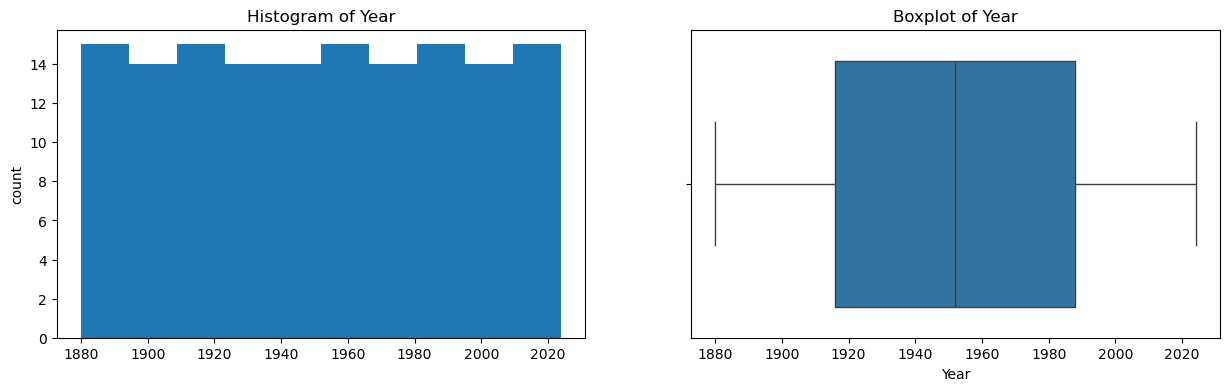

Jan
Skew : 0.59


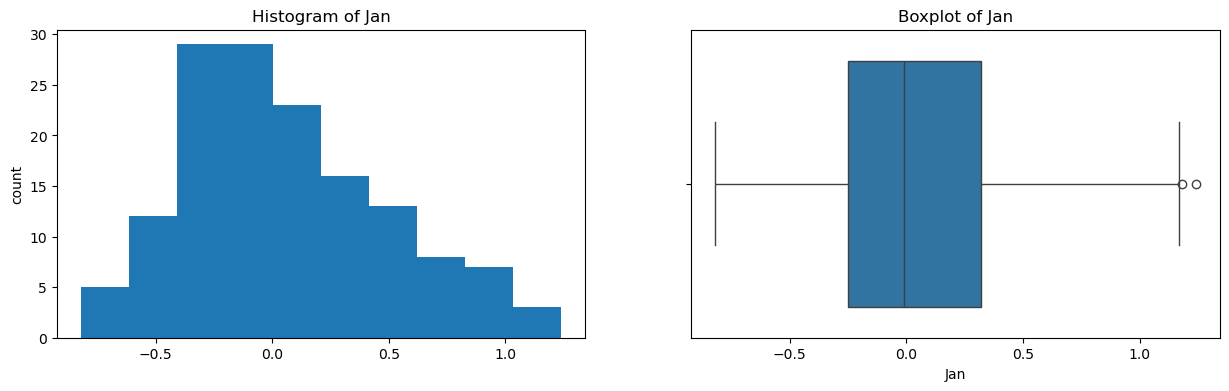

Feb
Skew : 0.76


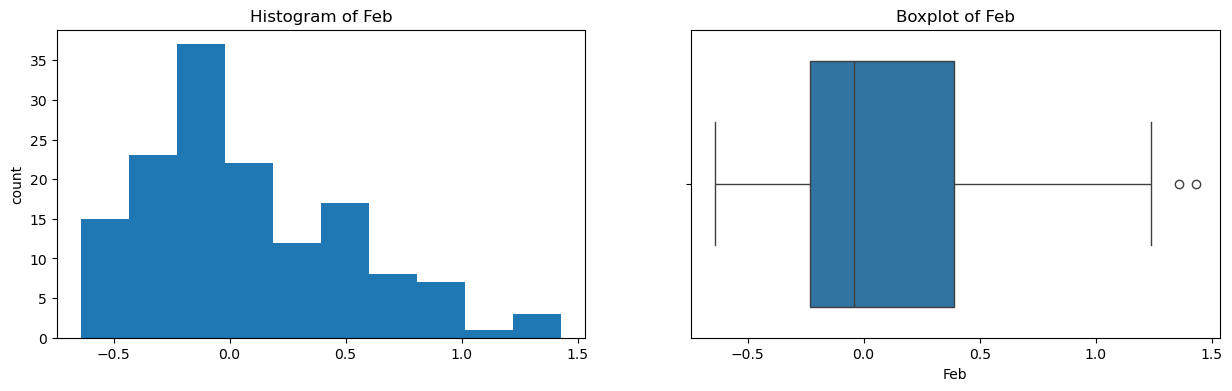

Mar
Skew : 0.9


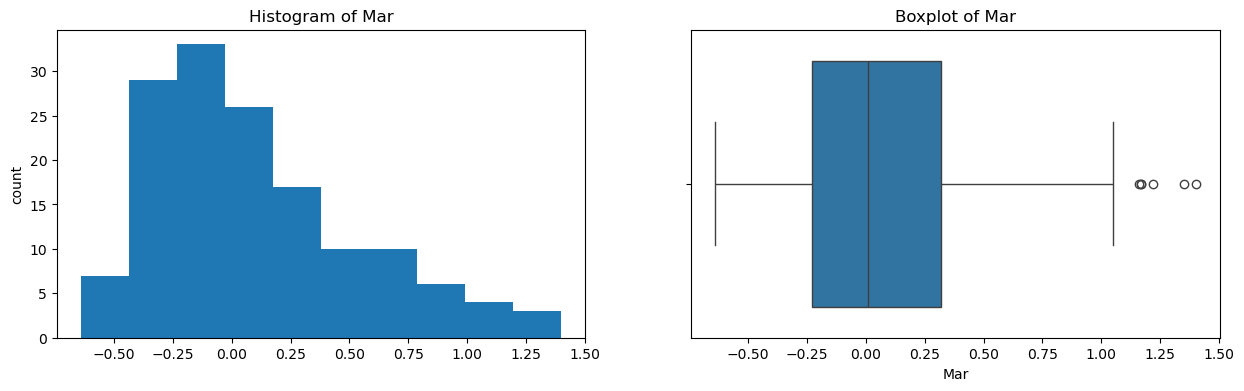

Apr
Skew : 0.81


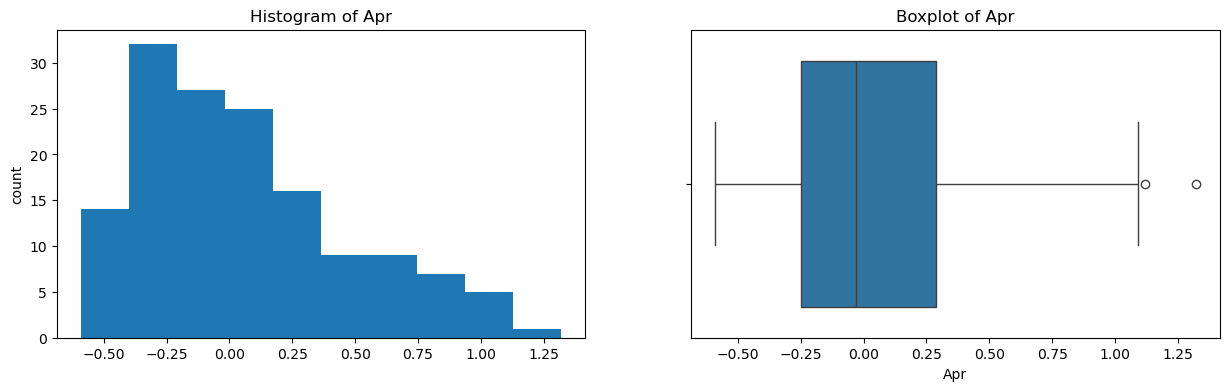

May
Skew : 0.8


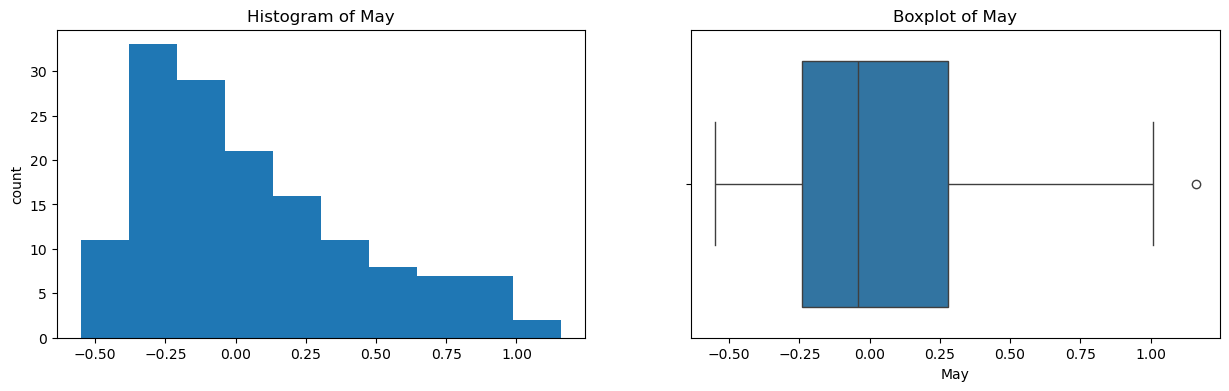

Jun
Skew : 0.87


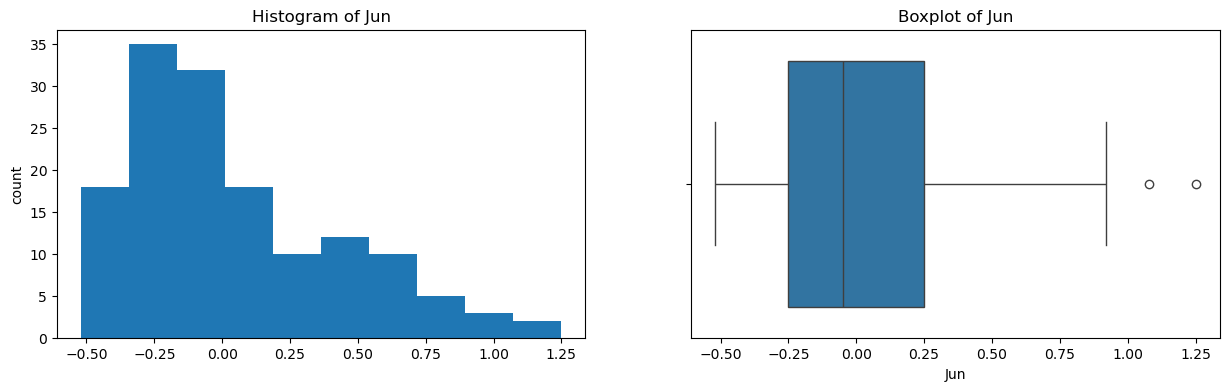

Jul
Skew : 1.01


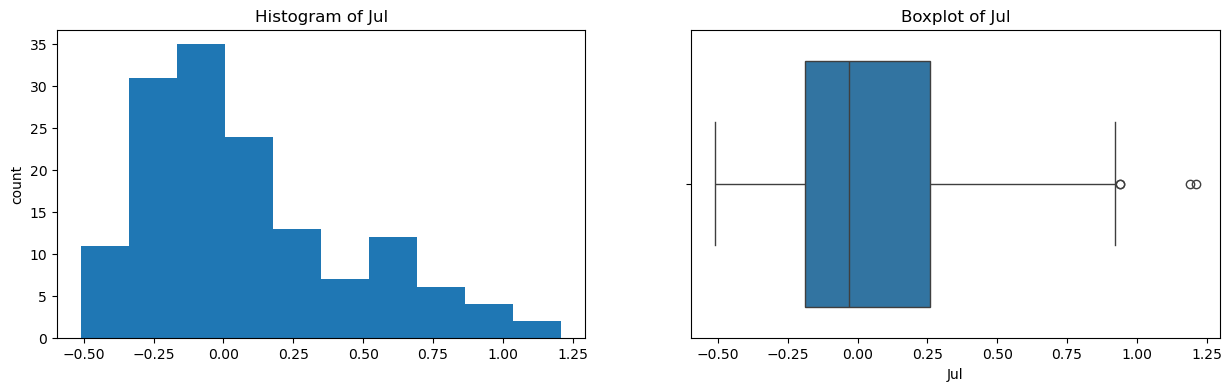

Aug
Skew : 1.0


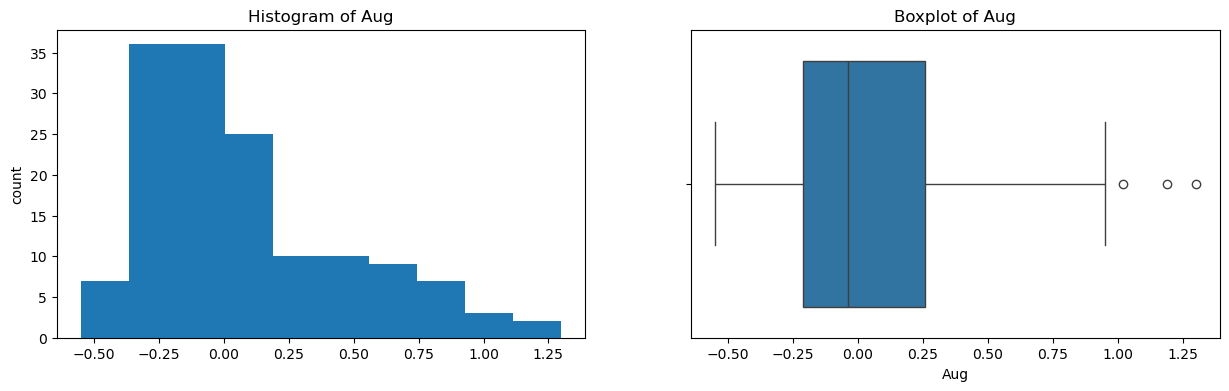

Sep
Skew : 1.07


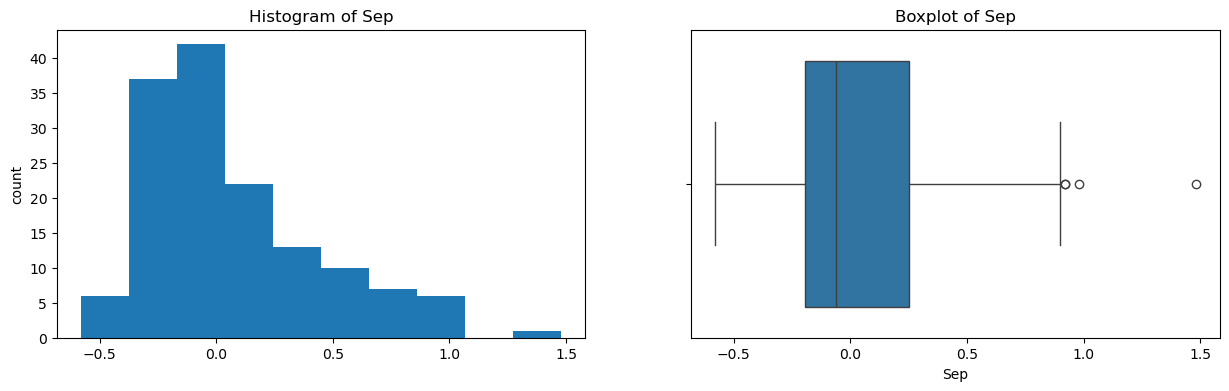

Oct
Skew : 1.0


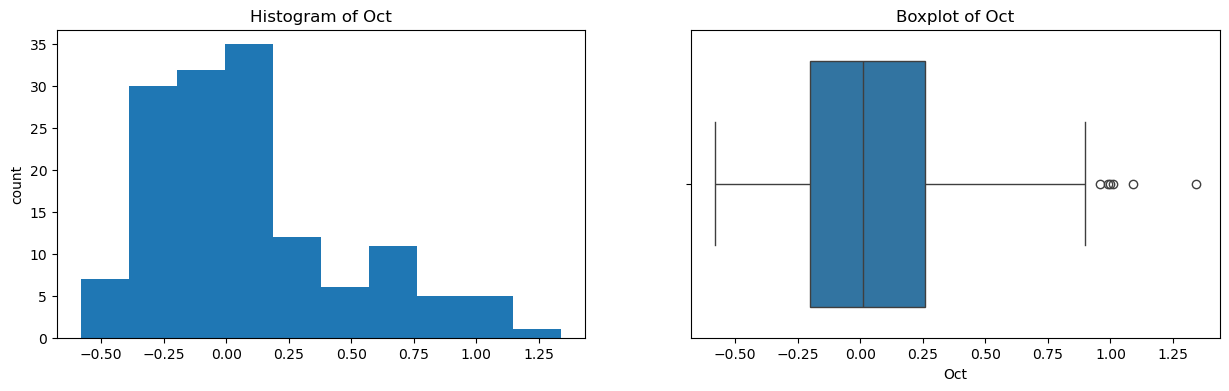

Nov
Skew : 0.98


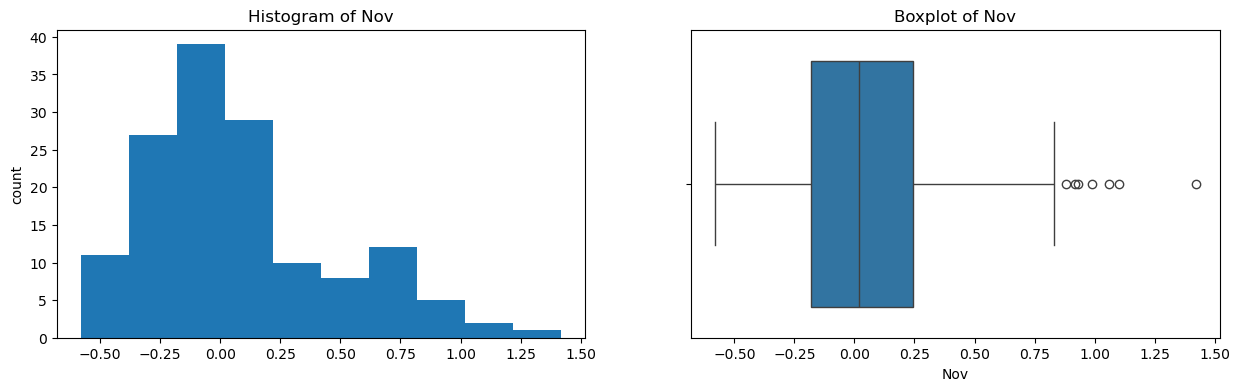

Dec
Skew : 0.72


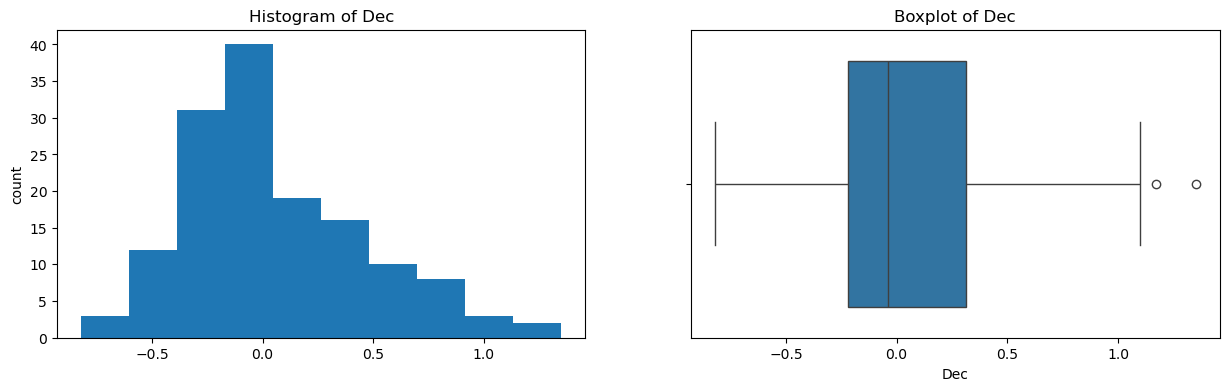

J-D
Skew : 0.91


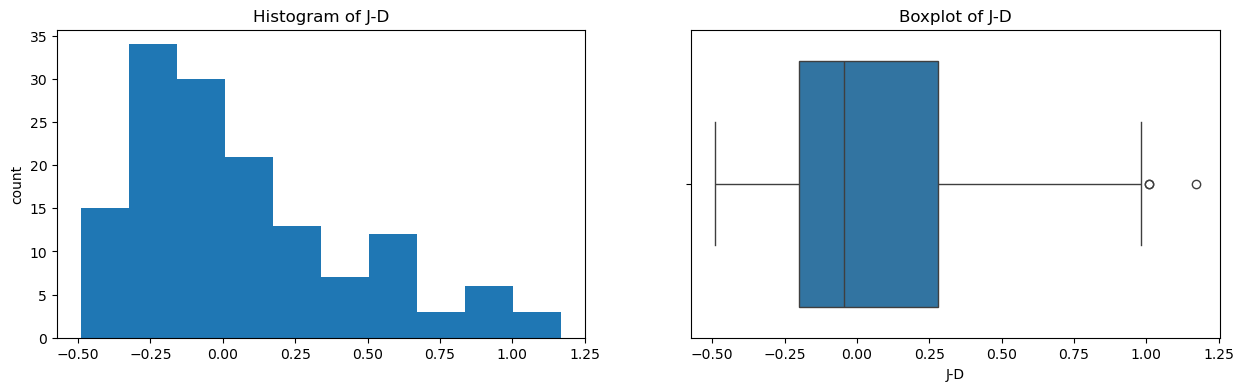

D-N
Skew : 0.89


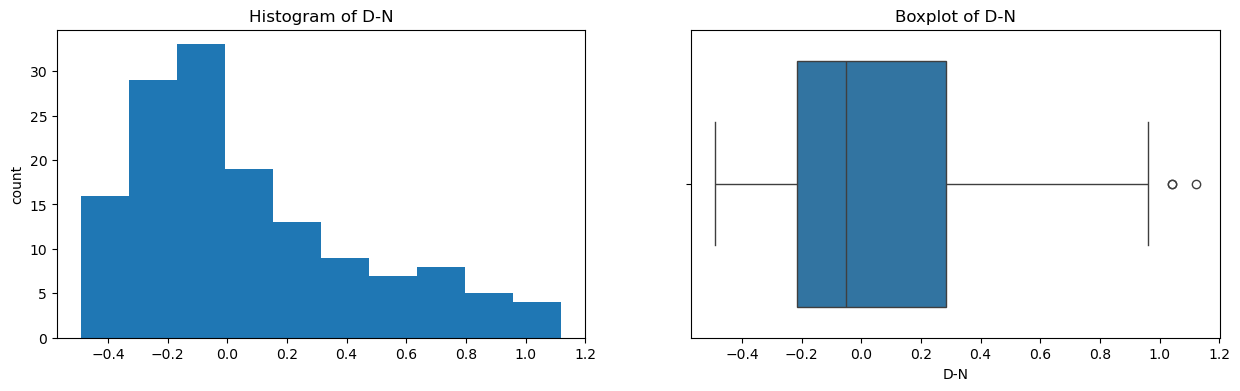

DJF
Skew : 0.76


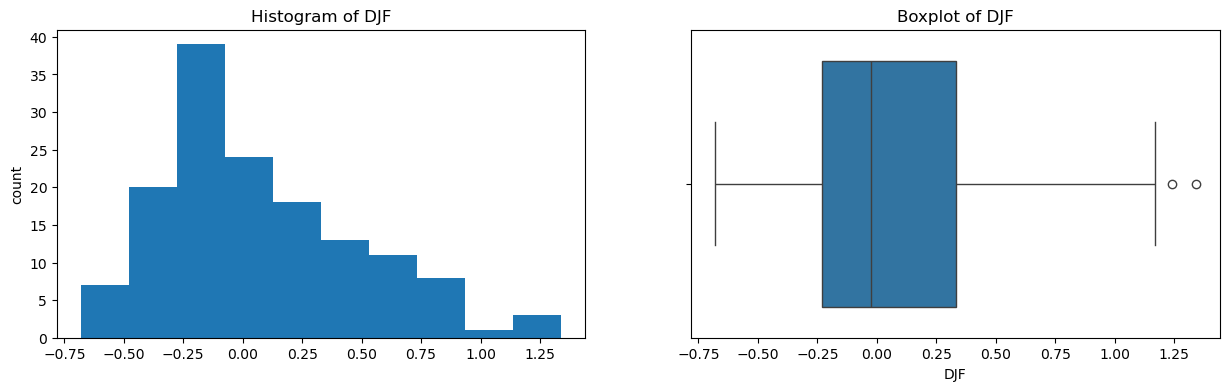

MAM
Skew : 0.87


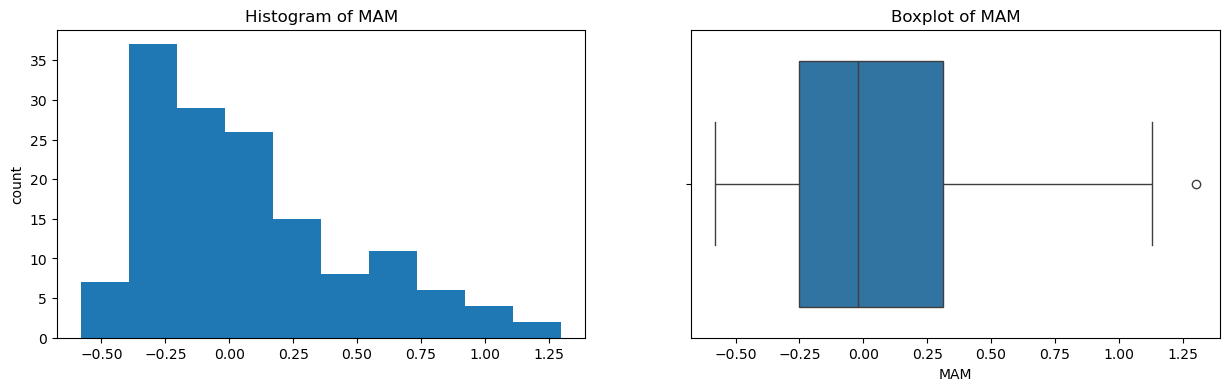

JJA
Skew : 0.98


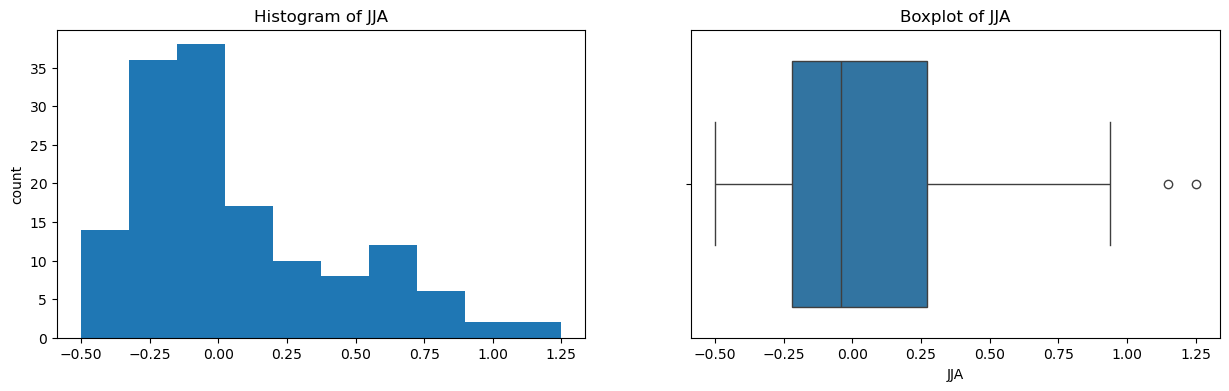

SON
Skew : 1.06


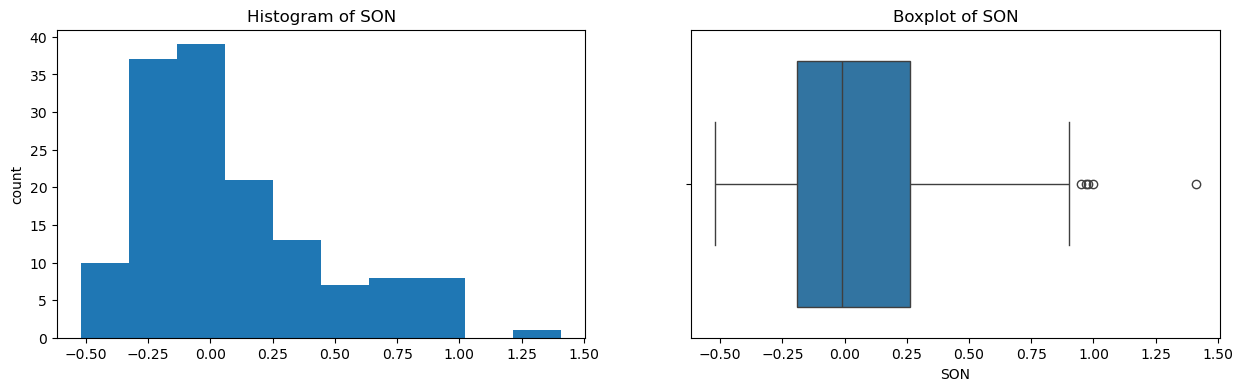

Annual_Mean_Temp_Anomaly
Skew : 0.98


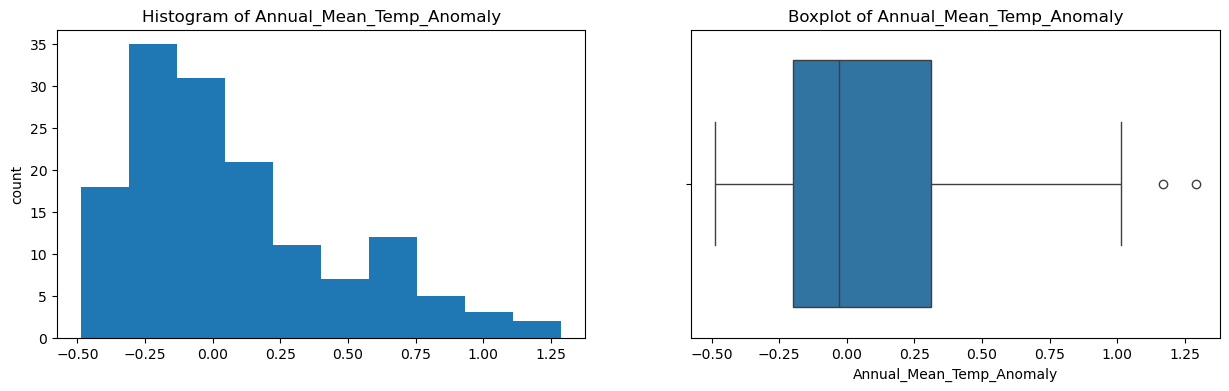

In [29]:
# List all columns
cont_cols = list(temp_data.columns)

# Perform the univariate analysis with histograms and boxplots
for col in cont_cols:
    print(col)
    
    # Drop NaN values before computing statistics
    col_data = temp_data[col].dropna()

    # Calculate skewness
    print('Skew :', round(col_data.skew(), 2))

    # Plot histogram and boxplot
    plt.figure(figsize=(15, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    col_data.hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col_data)
    plt.title(f'Boxplot of {col}')

    plt.show()

In [31]:
# Drop columns
temp_data.drop(columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'], errors='ignore', inplace=True)

# Filter the temperature data to only include records from 1958 onwards
sta_data = temp_data[temp_data['Year'] >= 1959]

# Check the first few rows to confirm filtering
print(sta_data.head())

# Summary statistics
print(sta_data.describe())

    Year  Annual_Mean_Temp_Anomaly
79  1959                  0.030833
80  1960                 -0.025000
81  1961                  0.057500
82  1962                  0.030833
83  1963                  0.054167
              Year  Annual_Mean_Temp_Anomaly
count    66.000000                 66.000000
mean   1991.500000                  0.386105
std      19.196354                  0.358618
min    1959.000000                 -0.199167
25%    1975.250000                  0.060208
50%    1991.500000                  0.325417
75%    2007.750000                  0.641875
max    2024.000000                  1.288750


In [33]:
# Load the GHG emissions dataset
ghg_data = pd.read_csv('../data/co2_annmean_mlo.csv', skiprows=43)

# Drop columns
ghg_data.drop(columns=['unc'], errors='ignore', inplace=True)

# Rename the 'year' column in the GHG emissions data to match the temperature data
ghg_data.rename(columns={'year': 'Year'}, inplace=True)

# Rename the 'year' column in the GHG emissions data to match the temperature data
ghg_data.rename(columns={'mean': 'Annual_Mean_CO2_ppm'}, inplace=True)

# Inspect the first few rows to verify the data is loaded correctly
print(ghg_data.head())

# Summary statistics
print(ghg_data.describe())

   Year  Annual_Mean_CO2_ppm
0  1959               315.98
1  1960               316.91
2  1961               317.64
3  1962               318.45
4  1963               318.99
             Year  Annual_Mean_CO2_ppm
count    65.00000            65.000000
mean   1991.00000           359.259385
std      18.90767            31.324085
min    1959.00000           315.980000
25%    1975.00000           331.130000
50%    1991.00000           355.700000
75%    2007.00000           384.020000
max    2023.00000           421.080000


In [35]:
# Merge the GHG emissions data with the filtered temperature anomalies data on the 'Year' column
merged_data = pd.merge(sta_data, ghg_data, on='Year', how='inner')

# Check the first few rows of the merged data
print(merged_data.head())

   Year  Annual_Mean_Temp_Anomaly  Annual_Mean_CO2_ppm
0  1959                  0.030833               315.98
1  1960                 -0.025000               316.91
2  1961                  0.057500               317.64
3  1962                  0.030833               318.45
4  1963                  0.054167               318.99


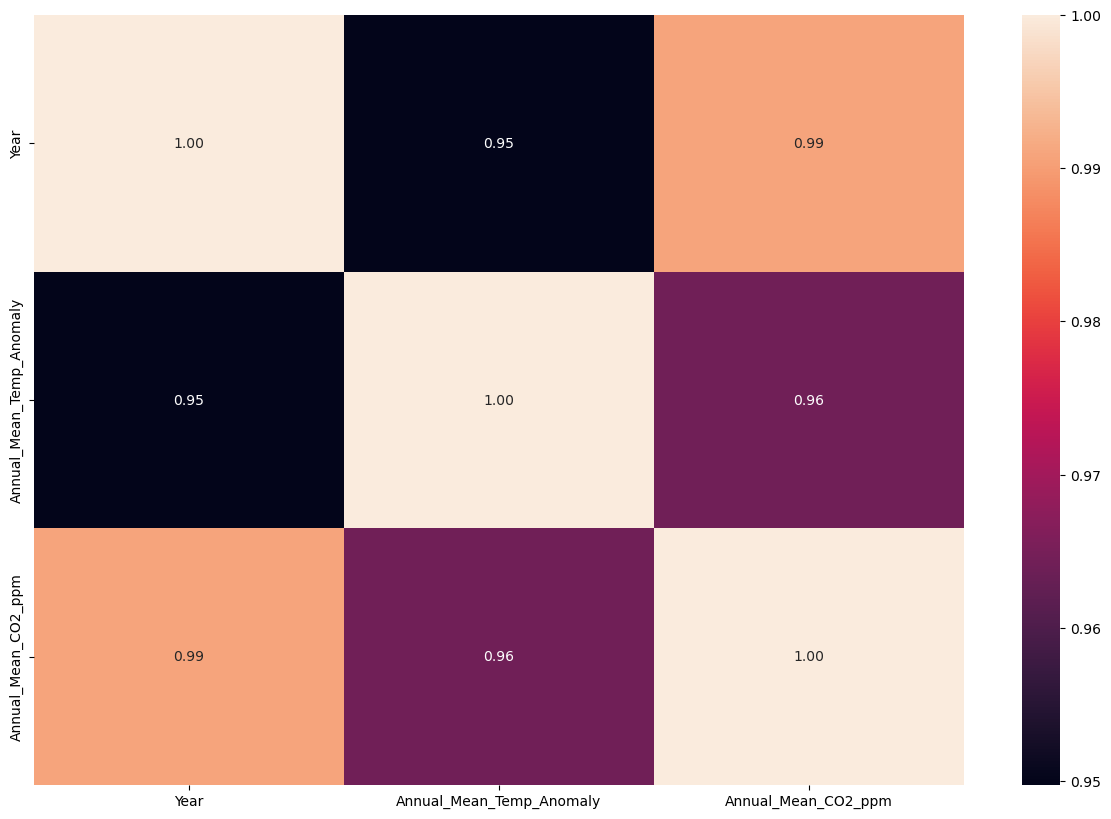

In [37]:
# Check correlation between different variables
plt.figure(figsize = (15, 10))

sns.heatmap(merged_data.corr(), annot = True, fmt = '0.2f')

plt.show()

**In the above steps, I have filtered datasets covering:**
* Annual mean surface temperature anomalies
* Annual mean atmospheric Co2
* Years, starting from 1959

**I merged them on the 'Year' column, and visualized them in a correlation heatmap above.**

**As you can see, there is a *very* strong positive correlation between each variable - 'Year', 'Annual_Mean_Temp_Anomaly', 'Annual_Mean_CO2_ppm' - indicating strong relationships between CO2 emissions, increases in temperature, and the passage of time.**

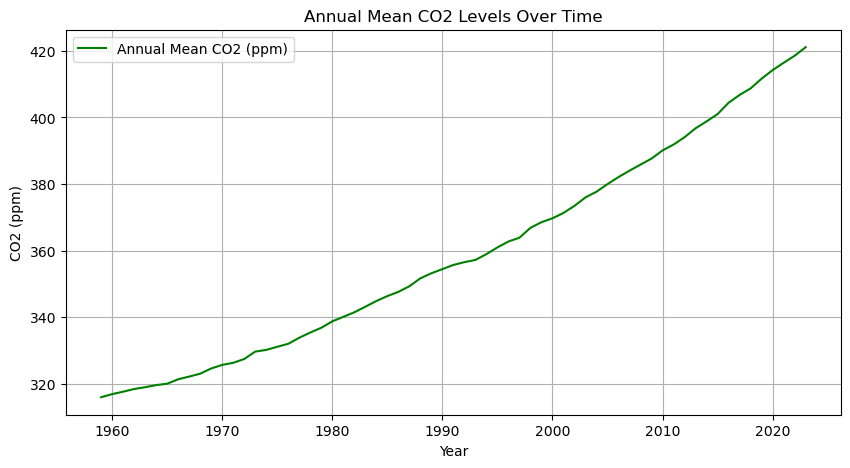

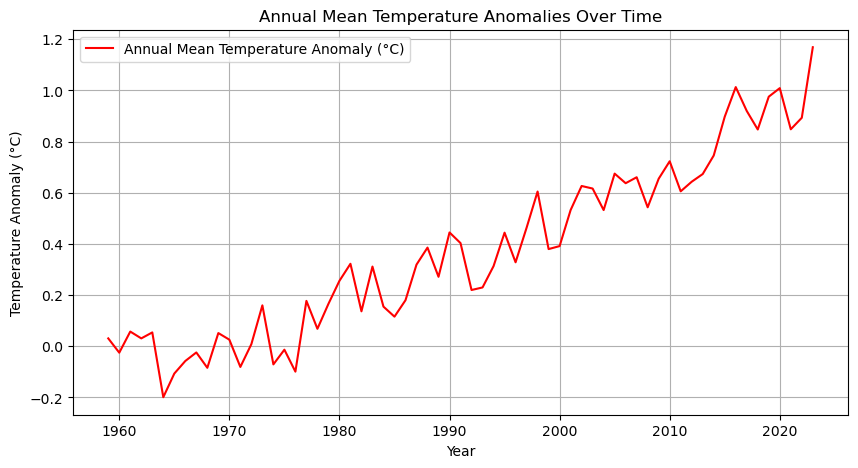

In [39]:
# Plot CO2 levels over time
plt.figure(figsize=(10, 5))
plt.plot(merged_data['Year'], merged_data['Annual_Mean_CO2_ppm'], label='Annual Mean CO2 (ppm)', color='green')
plt.title('Annual Mean CO2 Levels Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.grid(True)
plt.legend()
plt.show()

# Plot temperature anomalies over time
plt.figure(figsize=(10, 5))
plt.plot(merged_data['Year'], merged_data['Annual_Mean_Temp_Anomaly'], label='Annual Mean Temperature Anomaly (°C)', color='red')
plt.title('Annual Mean Temperature Anomalies Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.legend()
plt.show()

R-squared (R²): 0.93
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.09


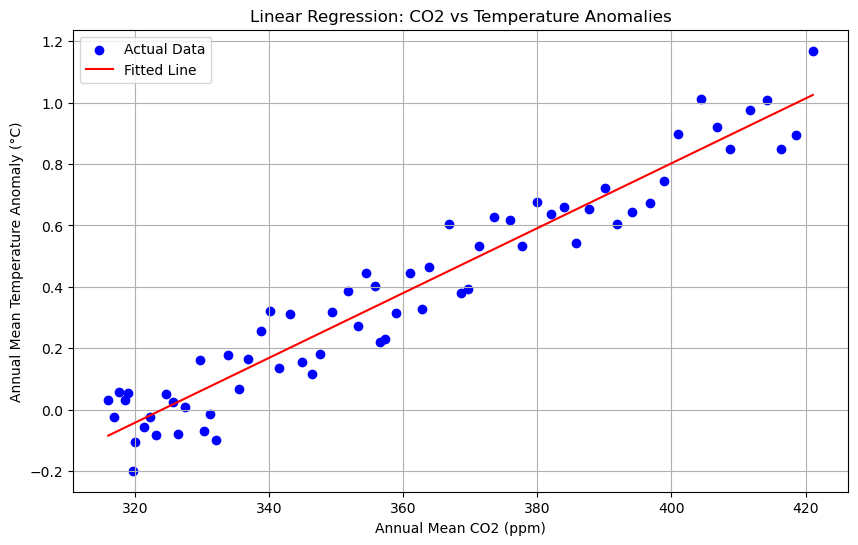

Slope (CO2 vs Temp Anomaly): 0.010560032553166798
Intercept: -3.421572847851184


<Figure size 640x480 with 0 Axes>

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Reshape the data for sklearn (as it expects 2D arrays for features)
X = merged_data['Annual_Mean_CO2_ppm'].values.reshape(-1, 1)
y = merged_data['Annual_Mean_Temp_Anomaly'].values

# Create and fit the linear regression model
model = LinearRegression()  # Initialize the model here
model.fit(X, y)

# Predict temperature anomalies using the model
y_pred = model.predict(X)

# Calculate R-squared (R²) score
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Annual_Mean_CO2_ppm'], merged_data['Annual_Mean_Temp_Anomaly'], color='blue', label='Actual Data')
plt.plot(merged_data['Annual_Mean_CO2_ppm'], y_pred, color='red', label='Fitted Line')
plt.title('Linear Regression: CO2 vs Temperature Anomalies')
plt.xlabel('Annual Mean CO2 (ppm)')
plt.ylabel('Annual Mean Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Save the image
plt.savefig('../media/sta_gfg_time.png')  

# Print the model's slope and intercept
print(f"Slope (CO2 vs Temp Anomaly): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


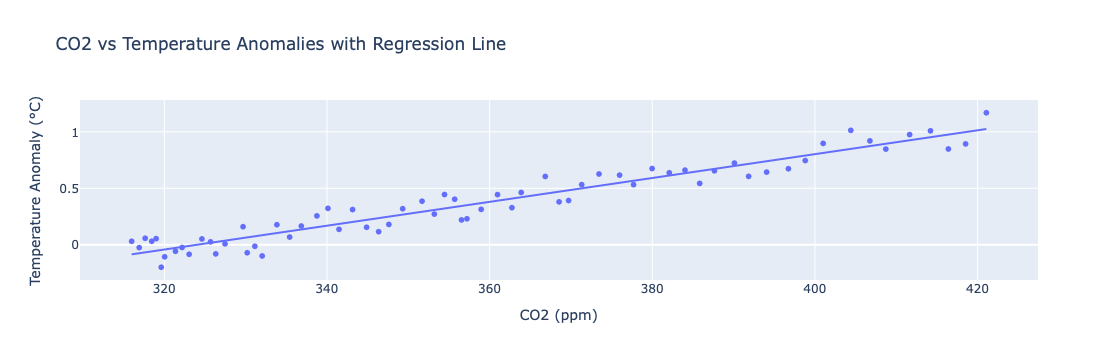

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     833.3
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           4.92e-38
Time:                        12:12:47   Log-Likelihood:                 64.107
No. Observations:                  65   AIC:                            -124.2
Df Residuals:                      63   BIC:                            -119.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4216      0.132    -25.938      0.0

In [62]:
import plotly.express as px

# Create a scatter plot with a regression line
fig = px.scatter(merged_data, 
                 x='Annual_Mean_CO2_ppm', 
                 y='Annual_Mean_Temp_Anomaly',
                 title='CO2 vs Temperature Anomalies with Regression Line',
                 labels={'Annual_Mean_CO2_ppm': 'CO2 (ppm)', 'Annual_Mean_Temp_Anomaly': 'Temperature Anomaly (°C)'},
                 trendline='ols')  # Adds a linear regression line

# Show R² in the hover tooltip by updating the figure with OLS results
results = px.get_trendline_results(fig)
ols_result = results.px_fit_results.iloc[0].summary()

# Save the interactive plot to an HTML file
fig.write_html("interactive_viz_with_regression.html")

# Show the plot in the notebook or in an interactive environment
fig.show()

# Optionally print the OLS summary to see detailed stats, including R²
print(ols_result)

In [138]:
# Load World Bank GDP growth and CO2 emissions data
gdp_data = pd.read_csv('../data/WB_GDP.csv', skiprows=3)
co2_data = pd.read_csv('../data/WB_CO2.csv', skiprows=3)

# Create a list of year columns (assuming they are from 1960 to 2023)
year_columns = [str(year) for year in range(1960, 2024)]

# Melt the GDP data
gdp_melted = pd.melt(gdp_data, id_vars=['Country Name'], value_vars=year_columns, 
                     var_name='Year', value_name='GDP')

# Melt the CO2 data
co2_melted = pd.melt(co2_data, id_vars=['Country Name'], value_vars=year_columns, 
                     var_name='Year', value_name='CO2 Emissions')

# Convert Year to numeric for both datasets
gdp_melted['Year'] = pd.to_numeric(gdp_melted['Year'])
co2_melted['Year'] = pd.to_numeric(co2_melted['Year'])

# Check the first few rows of melted data
print(gdp_melted.head())
print(co2_melted.head())


                  Country Name  Year           GDP
0                        Aruba  1960           NaN
1  Africa Eastern and Southern  1960  2.121696e+10
2                  Afghanistan  1960           NaN
3   Africa Western and Central  1960  1.188413e+10
4                       Angola  1960           NaN
                  Country Name  Year  CO2 Emissions
0                        Aruba  1960            NaN
1  Africa Eastern and Southern  1960            NaN
2                  Afghanistan  1960            NaN
3   Africa Western and Central  1960            NaN
4                       Angola  1960            NaN


In [140]:
# Merge the GDP and CO2 data on 'Country Name' and 'Year'
wb_merged_data = pd.merge(gdp_melted, co2_melted, on=['Country Name', 'Year'], how='inner')

# Check the actual column names after merging
print(wb_merged_data.columns)

Index(['Country Name', 'Year', 'GDP', 'CO2 Emissions'], dtype='object')


In [172]:
# Define the country cohort (list of countries to filter)
country_cohort = ['United States', 'China', 'European Union', 'Russia', 'India', 'Japan', 'Indonesia', 'Brazil', 'Mexico', 'South Korea']

# Filter by country cohort
filtered_data = wb_merged_data[wb_merged_data['Country Name'].isin(country_cohort)]

# Filter by year (keeping data from 1990 onwards)
filtered_data = filtered_data[filtered_data['Year'] >= 1990]

# Check the filtered data
print(filtered_data.head())

# Generate summary statistics
print(filtered_data.describe())

        Country Name  Year           GDP  CO2 Emissions
8009          Brazil  1990  3.849598e+11       197897.4
8020           China  1990  3.608579e+11      2173364.2
8053  European Union  1990  6.509871e+12      3567900.9
8086       Indonesia  1990  1.061407e+11       148342.9
8089           India  1990  3.209790e+11       563575.4
              Year           GDP  CO2 Emissions
count   272.000000  2.720000e+02   2.480000e+02
mean   2006.500000  5.138072e+12   2.287153e+06
std       9.828793  5.938688e+12   2.468121e+06
min    1990.000000  9.544555e+10   1.483429e+05
25%    1998.000000  8.172609e+11   4.341982e+05
50%    2006.500000  2.083552e+12   1.169970e+06
75%    2015.000000  7.573597e+12   3.413420e+06
max    2023.000000  2.736094e+13   1.094469e+07


In [174]:
# Calculate the correlation between GDP Growth and CO2 Emissions
correlation = filtered_data[['GDP', 'CO2 Emissions']].corr()
print(correlation)

                    GDP  CO2 Emissions
GDP            1.000000       0.667727
CO2 Emissions  0.667727       1.000000


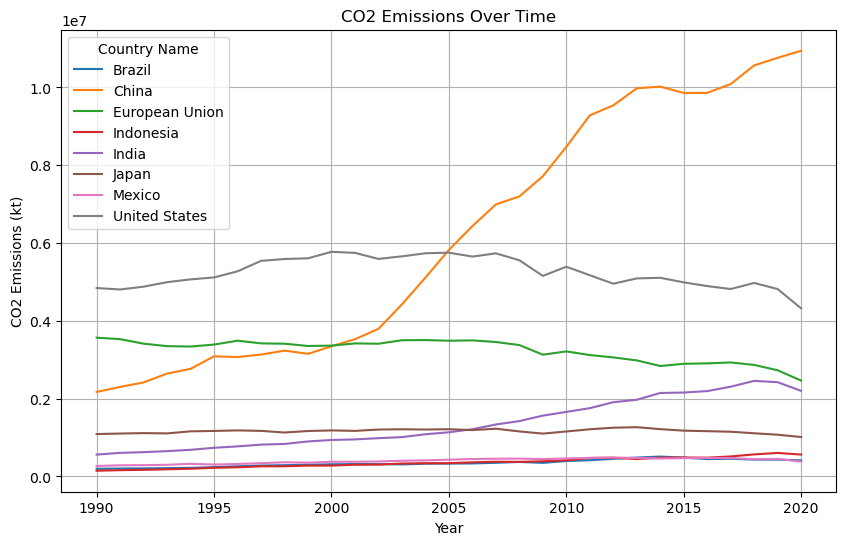

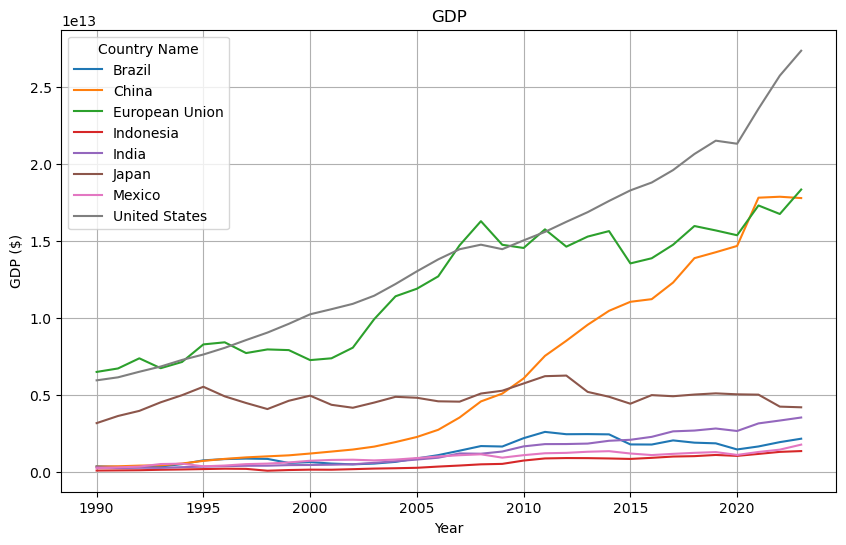

In [176]:
# Plot CO2 emissions over time for each country
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x='Year', y='CO2 Emissions', hue='Country Name')
plt.title('CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.grid(True)
plt.show()

# Plot GDP growth over time for each country
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x='Year', y='GDP', hue='Country Name')
plt.title('GDP')
plt.xlabel('Year')
plt.ylabel('GDP ($)')
plt.grid(True)
plt.show()

Country Name      0
Year              0
GDP               0
CO2 Emissions    24
dtype: int64
R-squared: 0.45
Mean Squared Error: 3362006122085.75
Root Mean Squared Error: 1833577.41


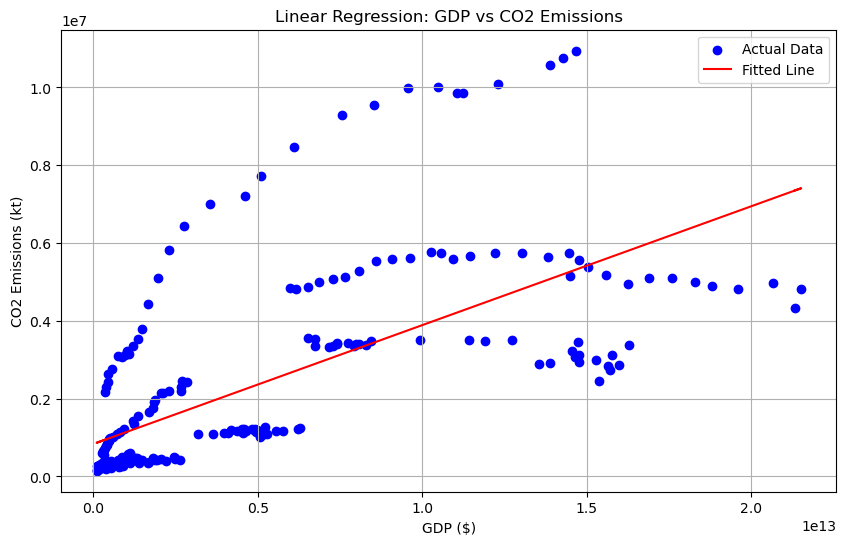

In [182]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Check for missing values
print(filtered_data.isna().sum())

# Option 1: Drop rows with NaN values
filtered_data = filtered_data.dropna(subset=['GDP', 'CO2 Emissions'])

# Prepare the data for regression
X = filtered_data[['GDP']].values  # Independent variable (GDP Growth)
y = filtered_data['CO2 Emissions'].values  # Dependent variable (CO2 Emissions)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
r2 = r2_score(y, y_pred)  # R-squared value
mse = mean_squared_error(y, y_pred)  # Mean squared error
rmse = np.sqrt(mse)  # Root mean squared error

# Print the evaluation metrics
print(f'R-squared: {r2:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.title('Linear Regression: GDP vs CO2 Emissions')
plt.xlabel('GDP ($)')
plt.ylabel('CO2 Emissions (kt)')
plt.legend()
plt.grid(True)
plt.show()

R-squared: 0.90
Mean Squared Error: 592226263354.72
Root Mean Squared Error: 769562.38


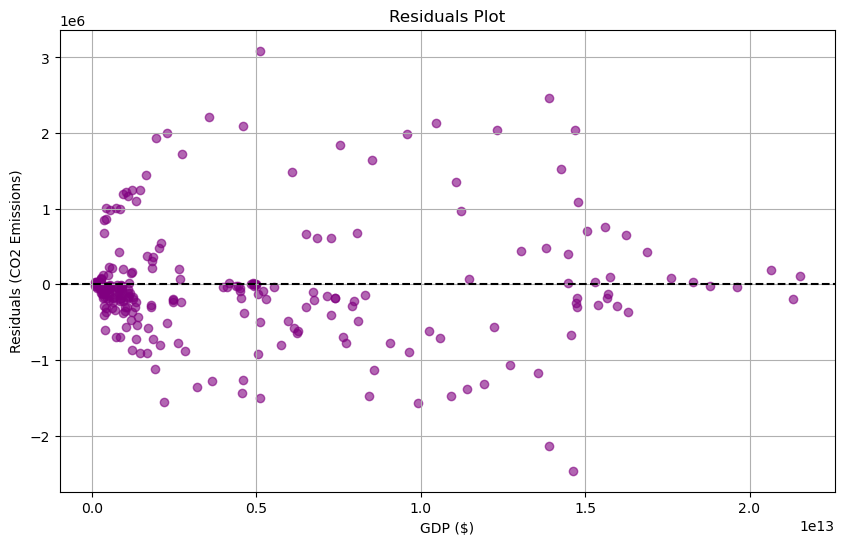

In [208]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data (using GDP as the independent variable and CO2 Emissions as the dependent variable)
X = filtered_data[['GDP']].values
y = filtered_data['CO2 Emissions'].values

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to the data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f'R-squared: {r2:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

# Calculate residuals
residuals = y - y_pred

# Scatter plot of residuals
plt.figure(figsize=(10, 6))
plt.scatter(X, residuals, color='purple', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('GDP ($)')
plt.ylabel('Residuals (CO2 Emissions)')
plt.grid(True)
plt.show()